In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
N = 1000

X = np.linspace(0,2,N)
Y = np.cos(X)
delta = X[1] - X[0]

In [12]:
delta*sum(Y), np.sin(2)

(0.9098815607204649, 0.9092974268256817)

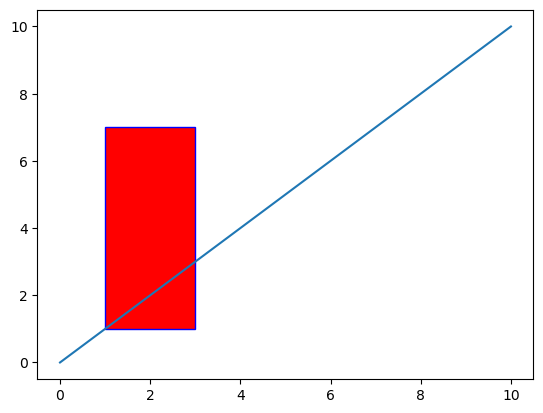

In [47]:
N = 20

from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot([0, 10],[0, 10])

#add rectangle to plot
ax.add_patch(Rectangle((1, 1), 2, 6, 
                       edgecolor='b', 
                       facecolor='r'))

#display plot
plt.show()

---

# Errors 

In [13]:
error_rectangle = []
for N in range(10,1000,20):

    X = np.linspace(0,2,N)
    Y = np.cos(X)
    delta = X[1] - X[0]
    error_rectangle.append(delta*sum(Y) - np.sin(2))

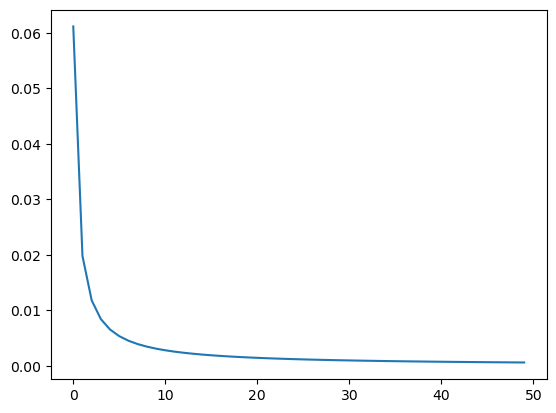

In [5]:
plt.plot(error_rectangle);

---

# Trapeze


[explanation on wiki](https://en.wikipedia.org/wiki/Trapezoidal_rule)

In [14]:

N = 100

X = np.linspace(0,2,N)
weights = 2*np.ones_like(X)
weights[0] = weights[-1] =  1
Y = np.cos(X)
delta = X[1] - X[0]
delta*weights @ Y /2

0.9092665012870649

In [7]:
N = 100

X = np.linspace(0,2,N)
Y = np.cos(X)

delta = X[1] - X[0]
delta* (Y[0] + Y[-1] +  2*sum(Y[1:-1]))/2

0.9092665012870642

In [20]:
error_trapeze = []
for N in range(10,1000,20):

    X = np.linspace(0,2,N)
    Y = np.cos(X)
    delta = X[1] - X[0]
    error_trapeze.append(delta* (Y[0] + Y[-1] +  2*sum(Y[1:-1]))/2 - np.sin(2))

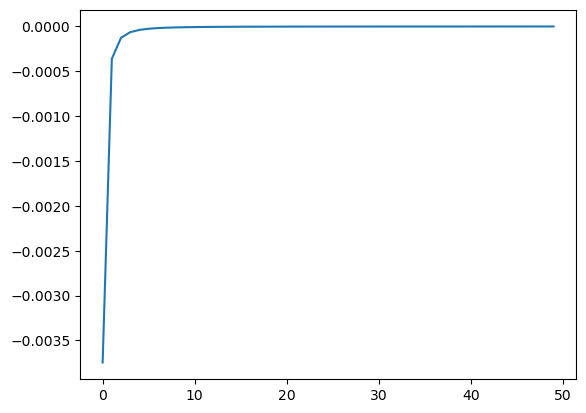

In [24]:
plt.plot(error_trapeze);

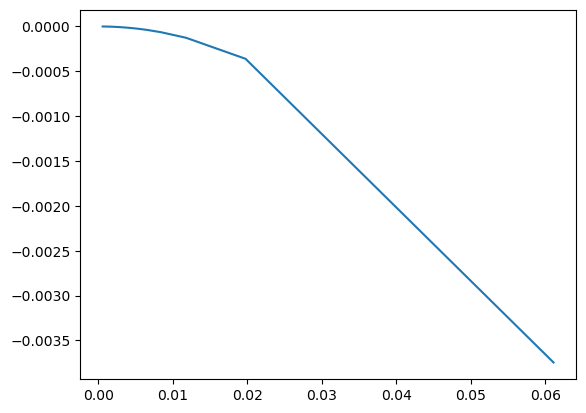

In [21]:
plt.plot(error_rectangle, error_trapeze);

---

# Simpson

[details](https://math24.net/simpsons-rule.html)

[explanation on wiki](https://en.wikipedia.org/wiki/Simpson%27s_rule)

In [4]:
N = 1000

X = np.linspace(0,2,N)
weights = 2*np.ones_like(X)
weights[1::2] = 4
weights[0] = weights[-1] =  1
Y = np.cos(X)
delta = X[1] - X[0]
delta*(weights @ Y) / 3

0.909574528346356

In [57]:
weights

array([1., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4.,
       2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4.,
       2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 1.])

# Alternative Simpson code 

In [22]:
N = 10000

X = np.linspace(0,2,N)
Y = np.cos(X)

delta = X[1] - X[0]
delta* (Y[0] + Y[-1] + 4*sum(Y[1::2]) + 2*sum(Y[2:-2:2]))/3

0.9092696506115666

In [23]:
N = 1000

X = np.linspace(0,2,N)

Y = np.cos(X)
delta = X[1] - X[0]
delta*(Y[0] + Y[-1] + 3*(sum(Y[1:-1:3]) +  sum(Y[2:-1:3]) )+ 2*sum(Y[3:-1:3]) )*3/8

0.9092974268258645

---

# Monte carlo

In [181]:
a, b  = 0, 2
N = 10000

X = (b-a)*np.random.rand(N) + a

(b-a)/N*sum(np.cos(X)) 


0.9073229157586732

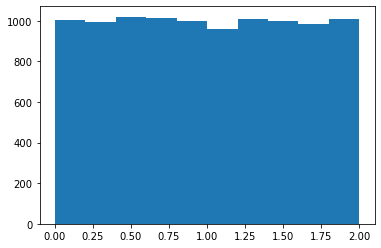

In [184]:
X = (b-a)*np.random.rand(N) + a

plt.hist(X);

In [198]:
# Area of a disc

N = 10000

X = np.random.rand(N).reshape((2,-1))
L = np.sum( X * X, axis=0)
2*np.count_nonzero(L < 1)/N

0.7954

In [197]:
np.pi/4

0.7853981633974483

In [194]:

X = np.random.rand(N).reshape((2,-1))
X*X

array([[0.11971062, 0.17905715, 0.40017859, 0.90262644, 0.06182962],
       [0.22885845, 0.8757727 , 0.10602717, 0.56652344, 0.38519476]])

# making random numbers with the Golden ratio

https://www.sciencedirect.com/science/article/pii/S0895717707002890

## Conclusions

Study of transcendental and algebraic numbers for random sequence sources for randomized algorithms. Our numerical experiment shows that pi () has always scored over phi (the golden ratio) in one-dimensional Monte Carlo integration. This implies that other transcendental numbers as well as algebraic numbers could also be investigated to determine the uniformity/discrepancy of distribution of random numbers generated out of them. This has not only academic interest but also possibly significant real-world applications. However, while quasi-random sequences are better suited for uniform scanning of a space such as that required in Monte Carlo integration, these need not fare better than the pseudo-random sequences for other kinds of problems such as the traveling salesman problem (TSP) [2]. These are because pseudo-random numbers are a bit too random unlike quasi-random numbers. Quasi-random numbers, on the other hand, are more uniformly distributed (with less discrepancy) than pseudo-random numbers.



[source](https://en.wikipedia.org/wiki/Low-discrepancy_sequence)

A **low-discrepancy sequence** is a sequence with the property that for all values of N,
its subsequence $x_1, ..., x_N$ has a low discrepancy.

Roughly speaking, the discrepancy of a sequence is low if the proportion of points in the sequence falling into an arbitrary set B is close to proportional to the measure of B, as would happen on average (but not for particular samples) in the case of an equidistributed sequence. Specific definitions of discrepancy differ regarding the choice of B (hyperspheres, hypercubes, etc.) and how the discrepancy for every B is computed (usually normalized) and combined (usually by taking the worst value).

Low-discrepancy sequences are also called **quasirandom sequences**, due to their common use as a replacement of uniformly distributed random numbers. The "quasi" modifier is used to denote more clearly that the values of a low-discrepancy sequence are neither random nor pseudorandom, but such sequences share some properties of random variables and in certain applications such as the quasi-Monte Carlo method their lower discrepancy is an important advantage.

In [202]:
phi = (1 + np.sqrt(5))/2

# random 
V = [1]
for k in range(100):
    x = V[-1] + phi
    V.append(x - int(x) )
V = np.array(V)

In [203]:
a, b  = 0, 2
N = len(V)
X = (b-a)*V + a
(b-a)/N*sum(np.cos(X))


0.8908099726843334

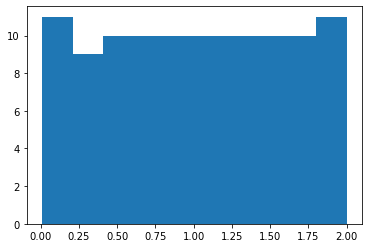

In [205]:
plt.hist(X);